In [274]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
import scipy.stats as stats
import seaborn as sns
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold

In [122]:
orig_data = pd.read_csv('saratoga-house-prices.csv')
orig_data.head(5)

,Price,Size,Baths,Bedrooms,Fireplace,Acres,Age
0,142.212,1.982,1.0,3,0,2.00,133
1,134.865,1.676,1.5,3,1,0.38,14
2,118.007,1.694,2.0,3,1,0.96,15
3,138.297,1.800,1.0,2,1,0.48,49
4,129.470,2.088,1.0,3,1,1.84,29


In this dataset, we have prices of houses (in dollars per sq. ft) made available along with the some properties of the house like area, number of bedrooms, age of house, etc. The goal is to create a model for the price as a function of those properties.

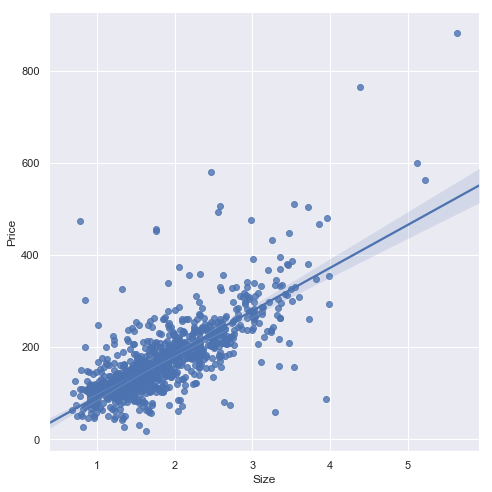

In [262]:
sns.set(color_codes=True)
filtered_df = orig_data[orig_data.Bedrooms < 6]
sns.lmplot(x="Size", y="Price", height=7, data=filtered_df);

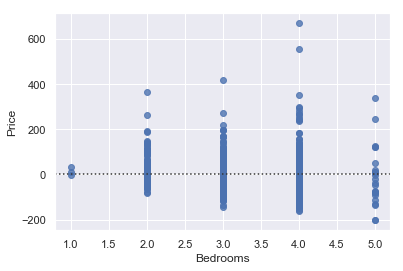

In [255]:
sns.residplot(x="Bedrooms", y="Price", data=filtered_df);

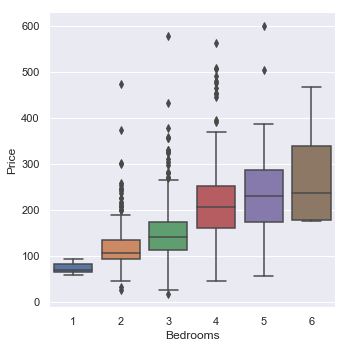

In [245]:
sns.catplot(x="Bedrooms", y="Price", kind="box", data=filtered_df);

In [126]:
x = filtered_df["Age"]
y = filtered_df["Price"]
np.corrcoef(x, y)[0][1]

-0.26140969022619415

In [278]:
def get_all_X_columns(df):
    return df[["Size", "Baths", "Bedrooms", "Fireplace", "Acres", "Age"]]

def get_X_columns(df):
    return df[["Size", "Baths"]]

def get_Y_column(df):
    return df["Price"]

In [279]:
def get_XY(data, X_columns_func=get_all_X_columns):
    X = X_columns_func(data).values
    Y = get_Y_column(data).values
    return X, Y

In [219]:
def get_model(X_train, Y_train):
    model = LinearRegression()
    model.fit(X_train, Y_train)
    return model

In [220]:
def get_errors(Y_train, Y_train_pred, Y_test, Y_test_pred):    
    training_rmse = math.sqrt(mean_squared_error(Y_train_pred, Y_train))
    test_rmse = math.sqrt(mean_squared_error(Y_test_pred, Y_test))
    training_rsq = r2_score(Y_train_pred, Y_train)
    test_rsq = r2_score(Y_test_pred, Y_test)
    return training_rmse, test_rmse, training_rsq, test_rsq

In [288]:
def plot_feature_weights(coef, X_columns_func=get_all_X_columns):
    features = X_columns_func(orig_data).columns.values
    weights = coef
    plt.bar(features, weights)
    for a,b in zip(features, weights):
        plt.text(a, b, "{0:.2f}".format(b))
    plt.show()

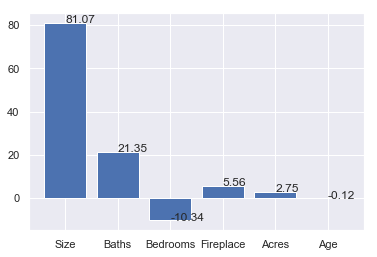

In [293]:
## Fitting attempt 1
X_train, Y_train = get_XY(filtered_df)
model = get_model(X_train, Y_train)
plot_feature_weights(model.coef_)
orig_data['predicted']=model.predict(get_all_X_columns(orig_data))
orig_data['residual']=orig_data['predicted'] - get_Y_column(orig_data)

[1516.82914065  813.09467659  268.20217068  216.81736999   34.17575511
   99.11826403] [2.00459395e-206 4.39988165e-133 6.88383756e-054 8.92104980e-045
 6.70518478e-009 2.22206099e-022]


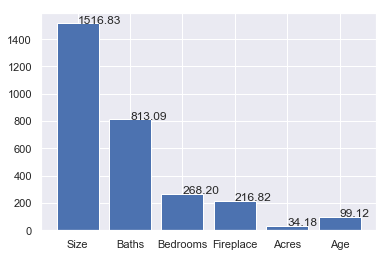

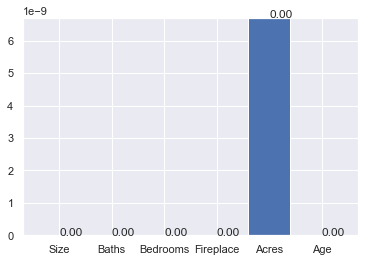

In [294]:
f, p = f_regression(X_train, Y_train, center=True)
print (f, p)
plot_feature_weights(f)
plot_feature_weights(p)

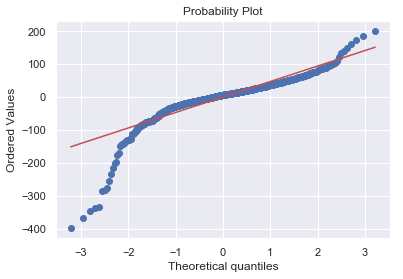

In [259]:
# Q-Q Plot
stats.probplot(orig_data['residual'], dist="norm", plot=pylab)
pylab.show()

The above Q-Q plot implies that there are outliers in the data, both in the negative side (y_actual is much less than y_pred) and on the positive side (y_actual is much higher than y_pred).

In [263]:
orig_data[(orig_data.residual < -200) | (orig_data.residual > 150)]

,Price,Size,Baths,Bedrooms,Fireplace,Acres,Age,predicted,residual
102,59.003,3.285,2.0,5,0,0.42,233,243.903030,184.900030
375,300.931,0.847,1.0,2,0,0.55,78,66.944211,-233.986789
408,738.919,4.372,5.0,7,1,0.68,144,404.309977,-334.609023
421,763.931,4.390,3.5,4,1,0.40,2,396.383971,-367.547029
422,882.341,5.632,5.5,4,1,5.88,2,544.439860,-337.901140
545,155.713,3.535,3.0,4,1,4.20,39,328.488740,172.775740
649,74.422,2.708,2.0,4,0,1.20,21,235.470902,161.048902
723,473.938,0.780,1.5,2,0,0.19,55,74.382337,-399.555663
725,578.856,2.472,2.5,3,1,0.00,6,232.381866,-346.474134
729,506.149,2.586,3.0,4,1,0.21,3,251.884420,-254.264580


Training, test data shape: (850, 9) (213, 9)


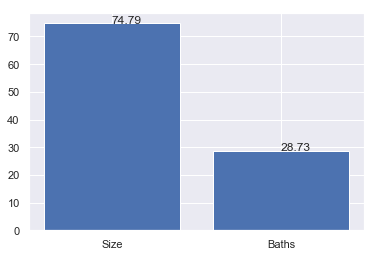

Training, test data shape: (850, 9) (213, 9)


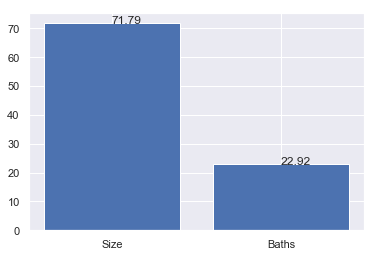

Training, test data shape: (850, 9) (213, 9)


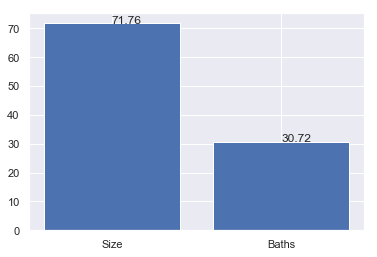

Training, test data shape: (851, 9) (212, 9)


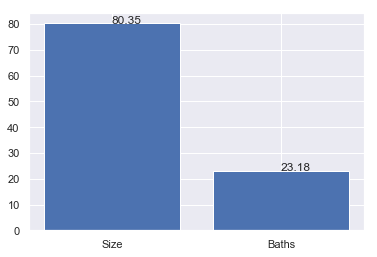

Training, test data shape: (851, 9) (212, 9)


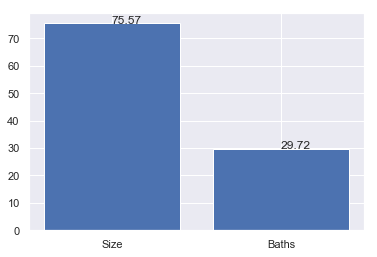

52.180789882469654 52.29905609110509 0.3753432609918671 0.33479402931622726


In [290]:
sum_train_error = 0
sum_test_error = 0
sum_train_rsq = 0
sum_test_rsq = 0

splits = 5
kf = KFold(n_splits=splits)
for train_indices, test_indices in kf.split(orig_data):
    data_train = orig_data.iloc[train_indices]
    data_test = orig_data.iloc[test_indices]
    print ("Training, test data shape:", data_train.shape, data_test.shape)
    
    X_data_train, Y_data_train = get_XY(data_train, get_X_columns)
    model = get_model(X_data_train, Y_data_train)
    plot_feature_weights(model.coef_, get_X_columns)
    
    X_train, Y_train = get_XY(data_train, get_X_columns)
    X_test, Y_test = get_XY(data_test, get_X_columns)
    Y_train_pred, Y_test_pred = model.predict(X_train), model.predict(X_test)
    training_rmse, test_rmse, training_rsq, test_rsq = \
        get_errors(Y_train, Y_train_pred, Y_test, Y_test_pred)
    
    sum_train_error += training_rmse
    sum_test_error += test_rmse
    sum_train_rsq += training_rsq
    sum_test_rsq += test_rsq   

print(sum_train_error/splits, sum_test_error/splits, sum_train_rsq/splits, sum_test_rsq/splits)